# Primer ejemplo para hacer un notebook python
## Empezamos por hacer nuestro shell
Creamos nuestro Shell FCC de 10 capas, distancia interatómica de 2.78 Angstroms y hacemos un radcut de 15 A, y de igual manera lo visualizamos con jmol

In [7]:
from sys import path
import os
dir_actual = os.getcwd()
path.insert(0, 'C:/Users/guill/OneDrive/Documentos/Tesis/Proyect')

import myfuncions.core_shell_f as cs
import subprocess as sbp

coords = cs.cubeShell(1,2.78,'bcc')
#coords = cs.sphericalShave(coords,15)
name='ejem1.xyz'
cs.tomakeshell_wxyz(coords,'Pt',name)
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', name])

CompletedProcess(args=['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', 'ejem1.xyz'], returncode=0)

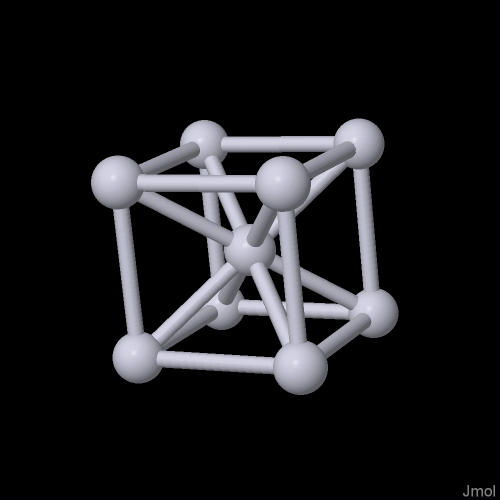

Hacemos el atpos y hacemos un .ini con lammpin
Nota: en caso de ser un .ini monoelemento es necesario cambiar manualmente 2 atom types en name.ini

In [8]:
atpos, eleList = cs.atpos_eleList_maker(coords,'Pt')
#from myfuncions.lammpin_f import wlammpin

#wlammpin(atpos,eleList,name)

### A trabajar con el dump
ahora estaremos trabajando con el dump, cambiando etiquetas y mostrandolo de nuevo

## Ahora haremos los gráficos y el análisis 

Grafico de distribuciones

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


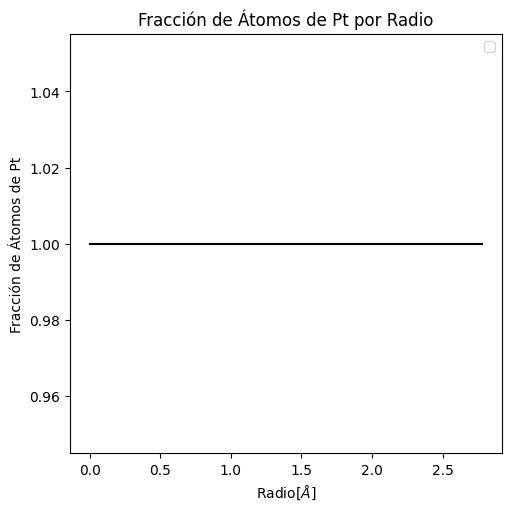

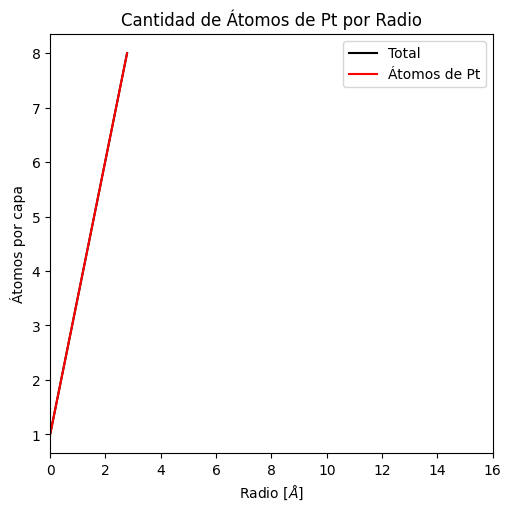

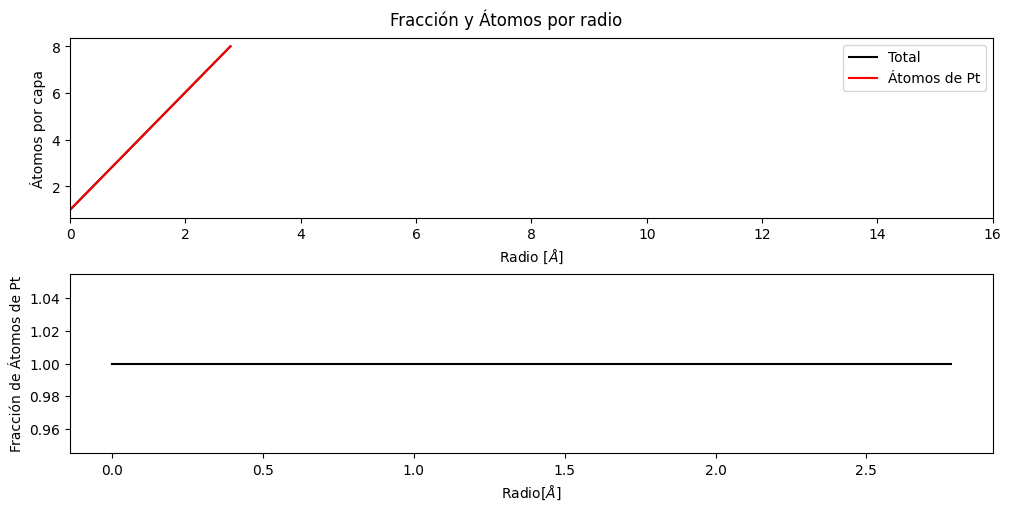

In [9]:
import myfuncions.graphs_f as plt


#atpos, eleList = plt.leer_xyz('ejem1_d.xyz')
plt.graficar_fracc_at_p_rad(atpos,'Pt')
plt.graficar_at_p_rad(atpos,'Pt')
plt.plot_fracc_y_at_p_rad(atpos,'Pt')

## Aquí se hace el PDF y la gráfica
oquettrnr

el proximo código arregla el problema de path

In [10]:
from sys import path
import os
dir_actual = os.getcwd()
path.insert(0, 'C:/Users/guill/OneDrive/Documentos/Tesis/Proyect')

In [25]:
import PDF.runner as pdf
#name = 'ejem1.xyz'
pdf.run_pdf_noMD(f'{name[:-4]}.xyz', dir_actual, 500,0.02,0,0)

c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\ejemplo\ejemplo 2 capas

           4  atomos            6  pares 
 Rango de distancias    2.77999330     -   4.53971004    
 Distancias promedio    3.21663499    
 Factor de normalizacion    1.92245901    



Hacemos la gráfica PDF

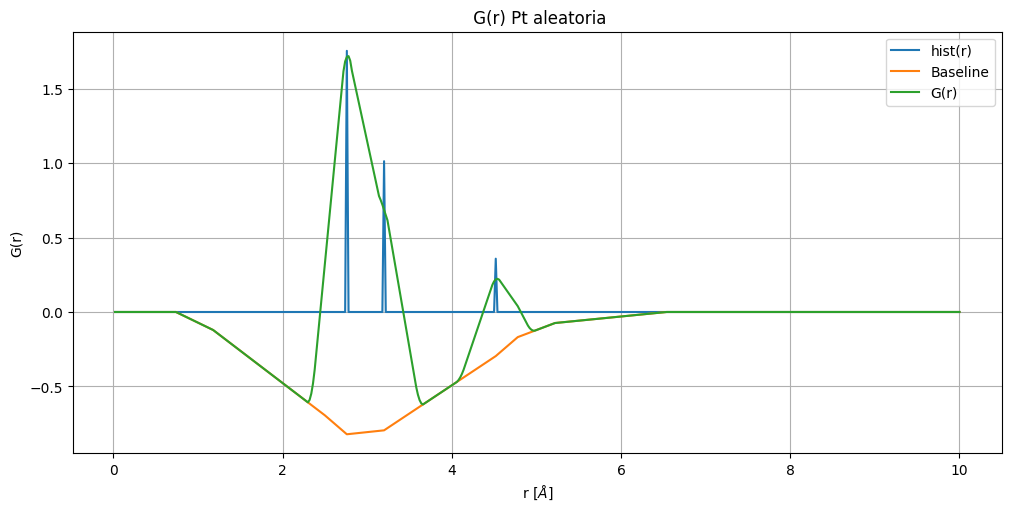

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


df_FCC= pd.read_csv('ejem1.txt', sep='\s+')


fig, ax =plt.subplots(figsize=(10,5), layout='constrained')
ax.plot(df_FCC['#r(A)'], df_FCC['hist(r)']/32, label='hist(r)')
ax.plot(df_FCC['#r(A)'], -df_FCC['Baseline'], label='Baseline')
ax.plot(df_FCC['#r(A)'], df_FCC['G(r)'], label='G(r)')


ax.set_xlabel('r [$\\AA$]')
#ax.set_xlim([0,6])
ax.set_ylabel('G(r)')
ax.set_title(' G(r) Pt aleatoria')
ax.grid('True', linestyle='-')
ax.legend()
plt.show()